In [2]:
#importing  the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import xgboost as xgb
import sklearn

# 1- Loading the dataset

In [3]:
#reading the data and keeping the index as the date and time
path_data_file = '/Users/macos/Desktop/demoday/demoday/ML_Model/Turbine_Data.csv'
data= pd.read_csv(path_data_file,
                    parse_dates=['Unnamed: 0'],# Using parse_dates make working with time series easier by automatically converting the column Data/Time to pandas date/time object.
                    index_col=['Unnamed: 0']) # Using index_col to set this column as a temporal index.
data.index = pd.to_datetime(data.index)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118224 entries, 2017-12-31 00:00:00+00:00 to 2020-03-30 23:50:00+00:00
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   ActivePower                   94750 non-null   float64
 1   AmbientTemperatue             93817 non-null   float64
 2   BearingShaftTemperature       62518 non-null   float64
 3   Blade1PitchAngle              41996 non-null   float64
 4   Blade2PitchAngle              41891 non-null   float64
 5   Blade3PitchAngle              41891 non-null   float64
 6   ControlBoxTemperature         62160 non-null   float64
 7   GearboxBearingTemperature     62540 non-null   float64
 8   GearboxOilTemperature         62438 non-null   float64
 9   GeneratorRPM                  62295 non-null   float64
 10  GeneratorWinding1Temperature  62427 non-null   float64
 11  GeneratorWinding2Temperature  62449 non-null   float64
 12

In [5]:
# Show dataset 
display(data.head())

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN


# 2- EDA

In [6]:
# droping duplicate rows
data.drop_duplicates(inplace=True)
print(f"Our dataset contains {data.shape[0]} rows and {data.shape[1]} columns ")

Our dataset contains 95185 rows and 21 columns 


In [7]:
# show the unique values ​​of each feature
display(data.nunique().sort_values(ascending=False))

WindSpeed                       94224
ActivePower                     94084
ReactivePower                   94040
AmbientTemperatue               93678
GeneratorWinding2Temperature    62424
GearboxOilTemperature           62412
GeneratorWinding1Temperature    62406
GearboxBearingTemperature       62313
BearingShaftTemperature         62286
GeneratorRPM                    61074
RotorRPM                        59254
MainBoxTemperature              49145
Blade3PitchAngle                39021
Blade2PitchAngle                39021
Blade1PitchAngle                38946
HubTemperature                  38119
NacellePosition                  6664
WindDirection                    6664
TurbineStatus                     353
ControlBoxTemperature               1
WTG                                 1
dtype: int64

##### I note that the last two features(variables)  ​have a distinct values ​​equal to 1, which means that their variance equals to  0,   
##### therefore the two varibles **ControlBoxTemperature** and **WTG** have no relevant information in our study.  
##### We can drop them.

In [8]:
unusual_features = ['ControlBoxTemperature','WTG'] #  the two irrelevant variables
data.drop(unusual_features, axis=1, inplace=True)

In [9]:
print("After removing the two insignificant features we have :")
print()
print(f"Our dataset contains {data.shape[0]} rows and {data.shape[1]} columns ")

After removing the two insignificant features we have :

Our dataset contains 95185 rows and 19 columns 


In [10]:
# Look for outliers
data.describe()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
count,94624.000000,93698.000000,62380.000000,41987.000000,41882.000000,41882.000000,62402.000000,62430.000000,62287.000000,62419.000000,62441.000000,62268.000000,62369.000000,72108.000000,94622.000000,62119.000000,6.275900e+04,72108.000000,94469.000000
mean,619.036994,28.777569,43.105338,9.751759,10.038709,10.038709,64.376222,57.561706,1102.146658,72.462897,71.829134,36.979752,39.635107,196.307894,88.070309,9.908585,2.284016e+03,196.307894,5.879193
std,610.917748,4.358470,5.168850,20.646533,20.272100,20.272100,10.020754,6.324124,527.967896,22.626685,22.649494,4.884101,5.428555,88.279316,116.498176,4.717546,3.590288e+05,88.279316,2.617241
min,-38.524659,0.000000,0.000000,-43.156734,-26.443415,-26.443415,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-203.182591,0.000000,0.000000e+00,0.000000,0.000000
25%,80.098952,25.625603,39.856871,-0.939896,-0.433316,-0.433316,57.925129,53.944023,1029.812895,55.492241,54.763998,33.977709,35.843574,145.000000,-0.433723,9.231097,2.000000e+00,145.000000,3.824572
50%,402.880706,28.338961,42.927465,0.395038,0.889782,0.889782,64.862406,57.197064,1124.930500,65.792061,65.006679,37.003815,39.500759,182.000000,35.938526,10.099272,2.000000e+00,182.000000,5.558520
75%,1073.979105,31.665910,47.018075,8.101939,8.481306,8.481306,71.104401,61.307270,1515.517020,85.874609,85.342714,40.009538,43.370342,271.000000,147.190453,13.600908,2.000000e+00,271.000000,7.505555
max,1779.032433,42.405597,55.088655,90.143610,90.017830,90.017830,82.237932,70.764581,1809.941700,126.773031,126.043018,47.996185,54.250000,357.000000,403.713620,16.273495,6.574653e+07,357.000000,22.970893


In [11]:
# Remove  negative values ​​of ActivePower
mask_power = data['ActivePower']>=0 # 'ActivePower' is a physical positive quantity which represents the active power of the wind turbine (watt/second).
data =  data[mask_power]

In [12]:
print("After removing the the outliers we have :")
print()
print(f"Our dataset contains {data.shape[0]} rows and {data.shape[1]} columns ")

After removing the the outliers we have :

Our dataset contains 78989 rows and 19 columns 


In [13]:
# Percenttage of missing values

print(f"{(data.isna().sum()/len(data))*100}")

ActivePower                      0.000000
AmbientTemperatue                1.306511
BearingShaftTemperature         33.955361
Blade1PitchAngle                54.794971
Blade2PitchAngle                54.900049
Blade3PitchAngle                54.900049
GearboxBearingTemperature       33.952829
GearboxOilTemperature           33.936371
GeneratorRPM                    33.941435
GeneratorWinding1Temperature    33.918647
GeneratorWinding2Temperature    33.909785
HubTemperature                  34.093355
MainBoxTemperature              33.980681
NacellePosition                 25.863095
ReactivePower                    0.053172
RotorRPM                        33.949031
TurbineStatus                   33.505931
WindDirection                   25.863095
WindSpeed                        0.389928
dtype: float64


##### I notice that most of the columns in our dataset have a lot of missing values except 3 columns "ActivePower" , "ReactivePower" and "WindSpeed". 
##### 

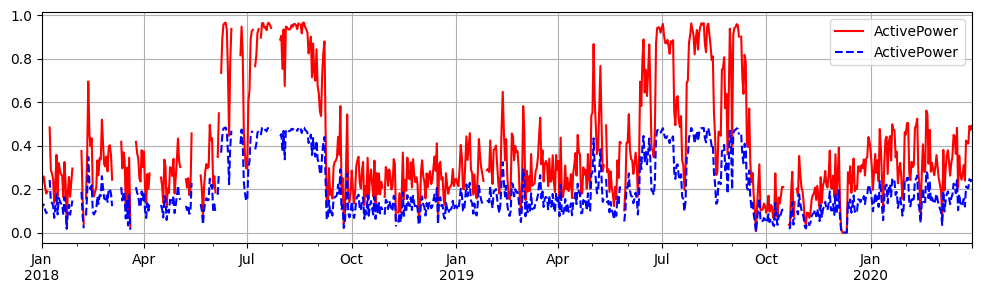

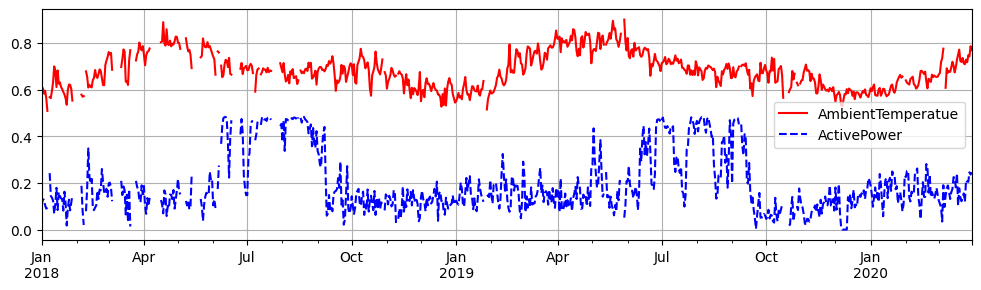

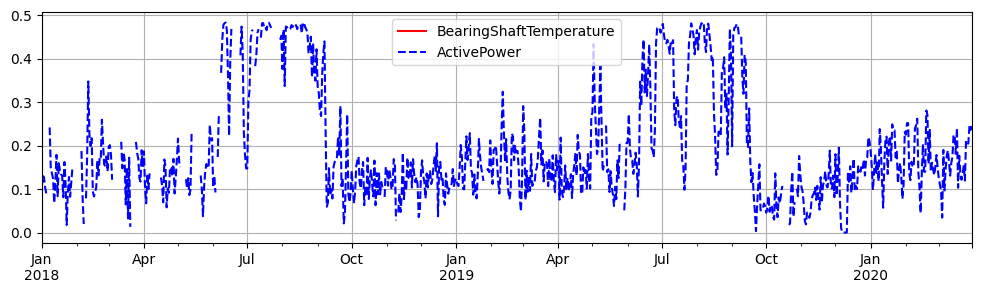

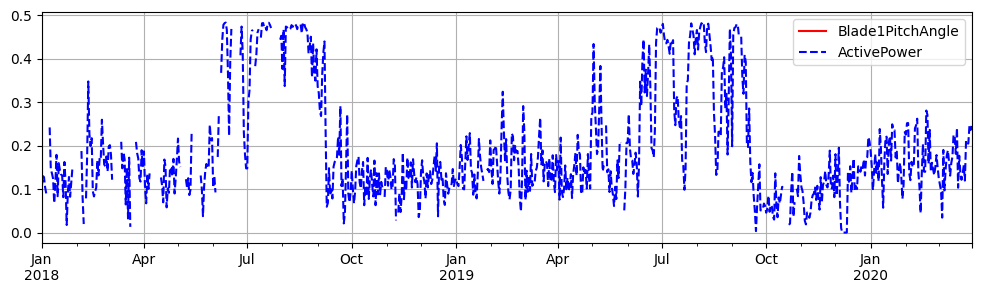

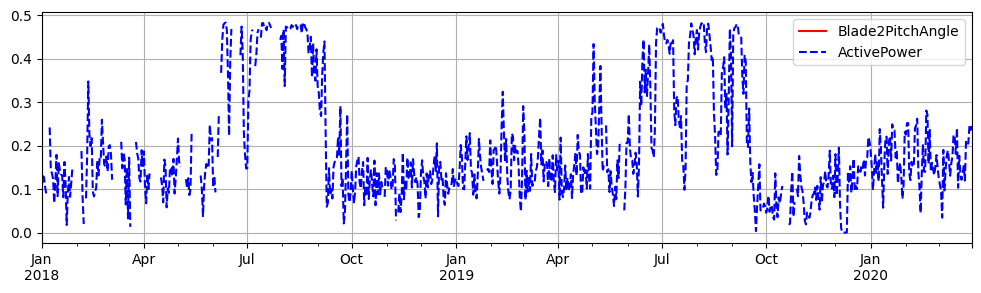

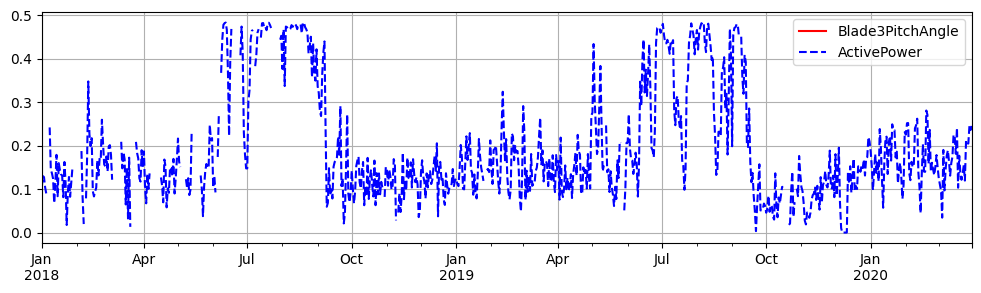

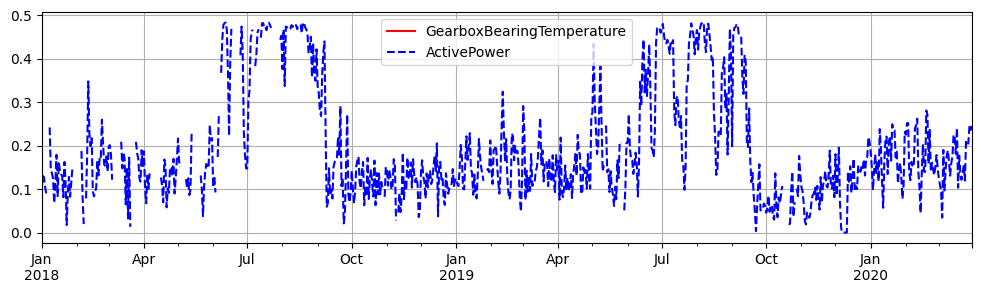

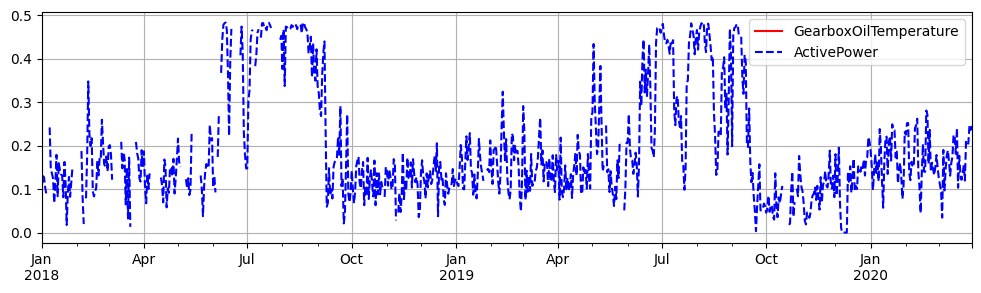

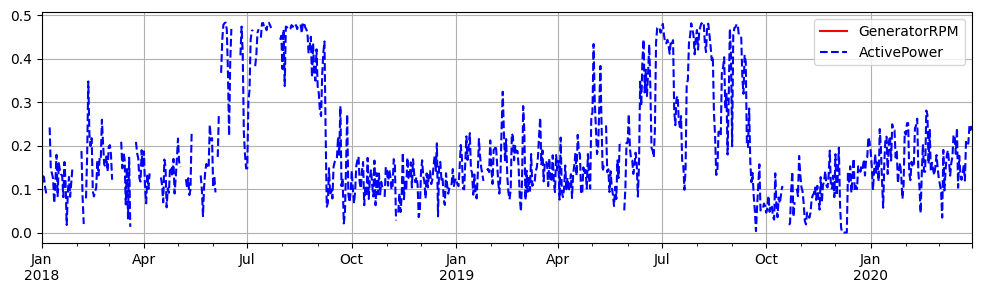

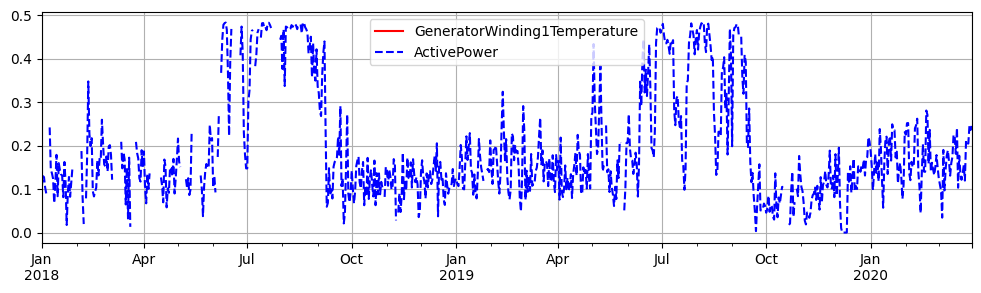

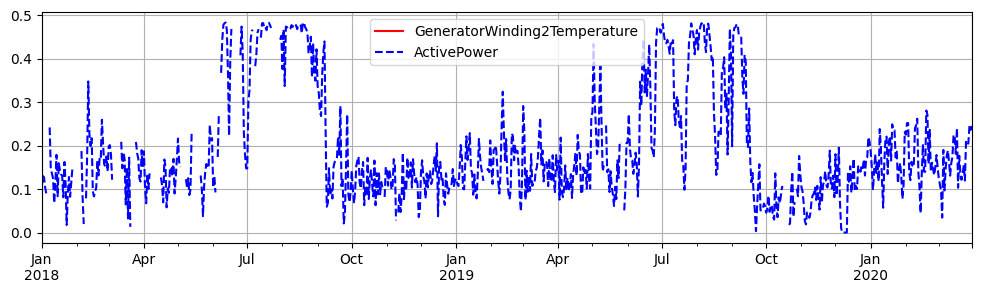

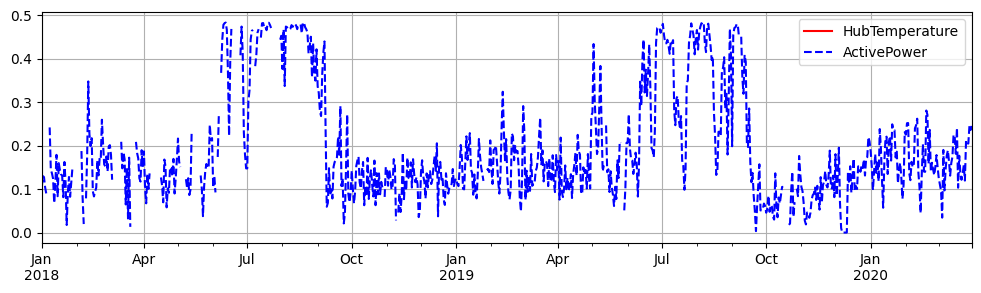

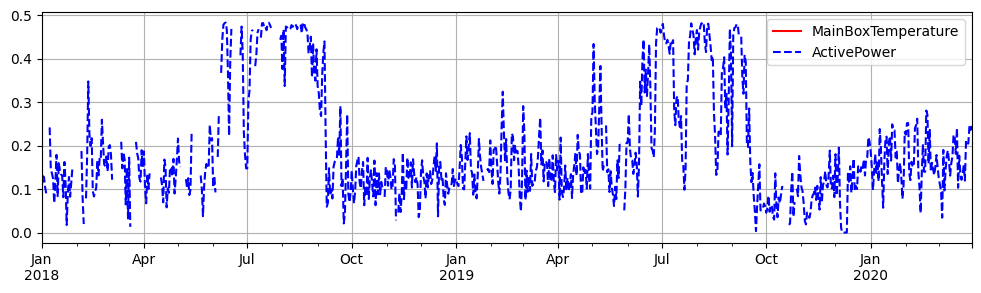

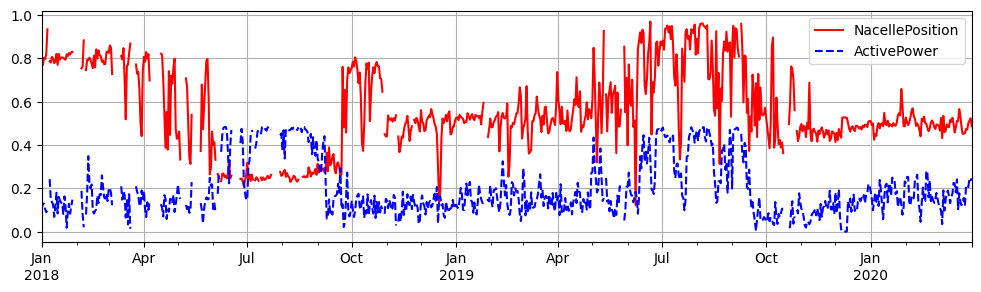

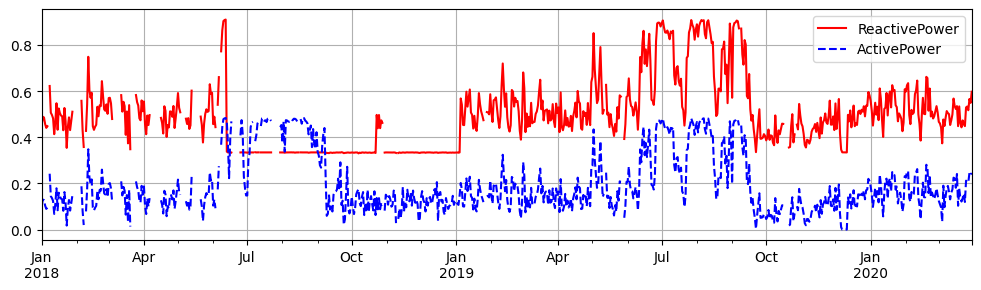

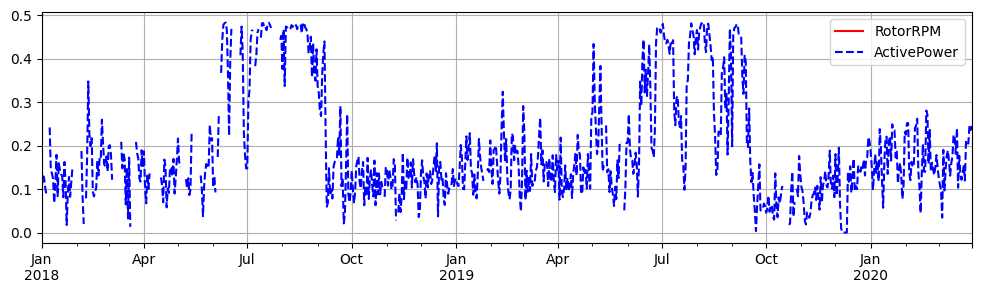

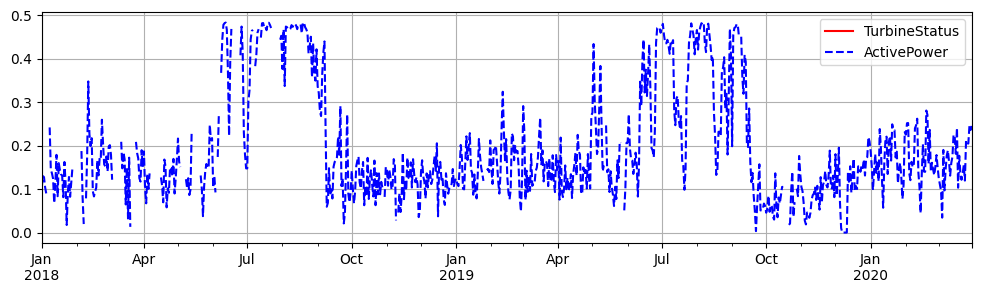

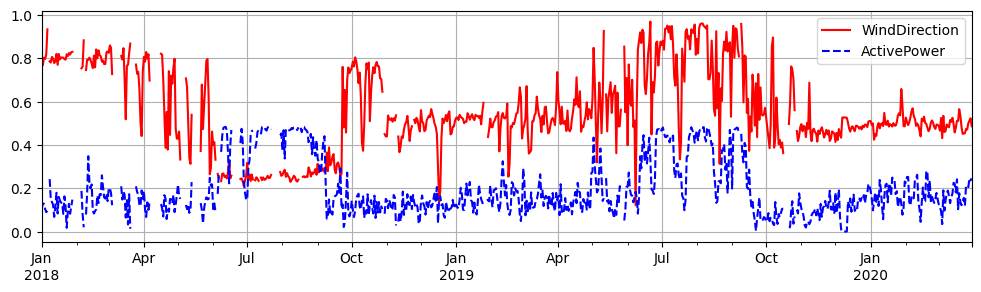

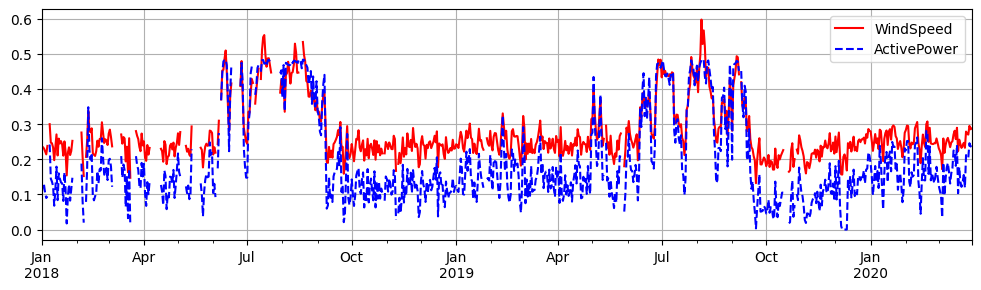

In [14]:
#data viz
data_viz = data.copy()
for i in data:
    mini = min(data_viz [i])
    maxi = max(data_viz [i])
    data_viz[i] = (data_viz[i]- mini)/(maxi-mini)# standardization ''' 
    
    plt.figure(figsize=(12,3))
    data_viz[i].resample('D').mean().plot(legend=i , c='r')  # daily temporal resolution "D"
    multiplicative_factor = 0.5 # to visually separate the two graphs
    (data_viz['ActivePower'] * multiplicative_factor).resample('D').mean().plot(style='--', legend='ActivePower' , c = 'b')
    plt.legend()
    plt.grid()
    plt.show()





##### Ican delete all the features (in red) which do not appear on the graphs which proves that they have no relationship with the target (in blue)

##### And to see more clearly we can change the temporal resolution to months.

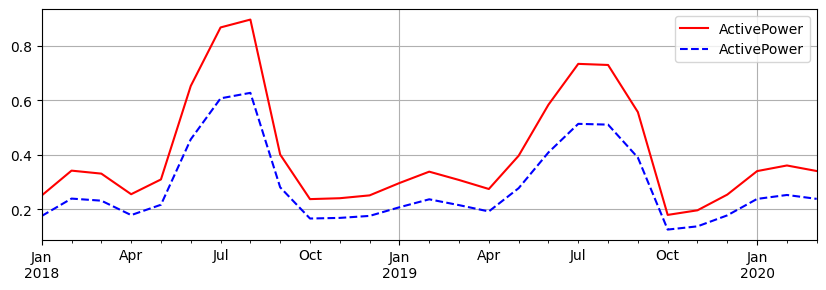

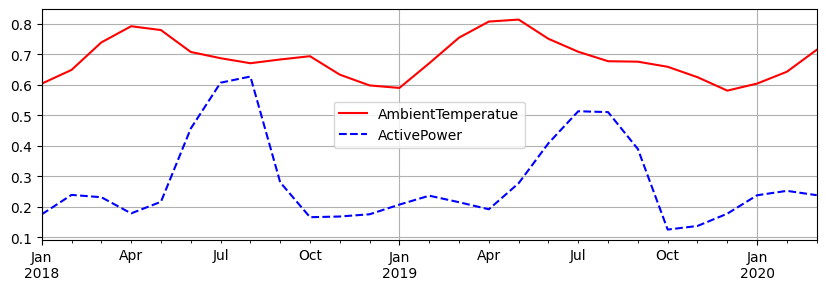

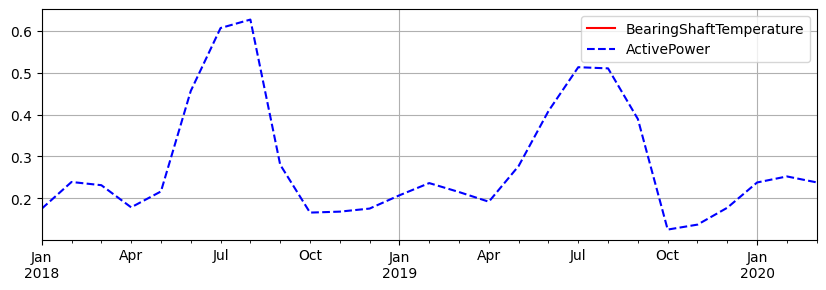

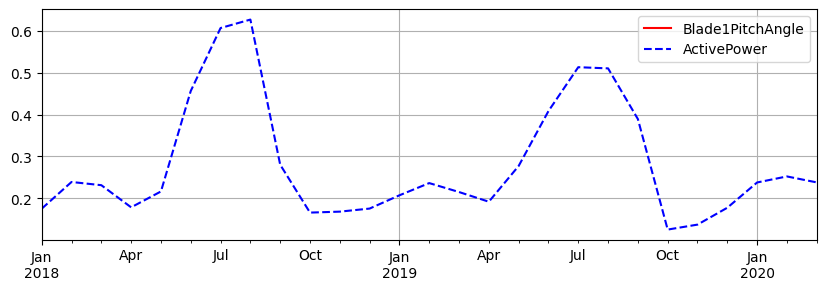

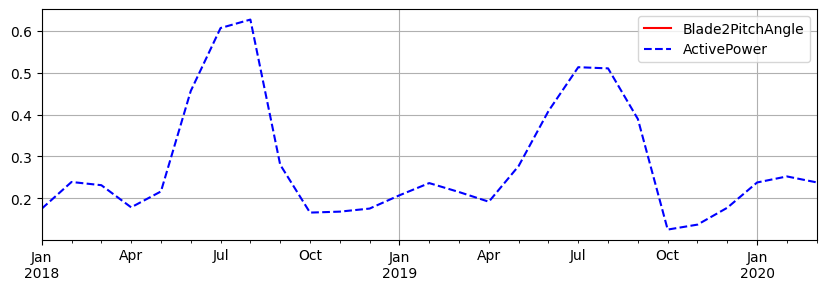

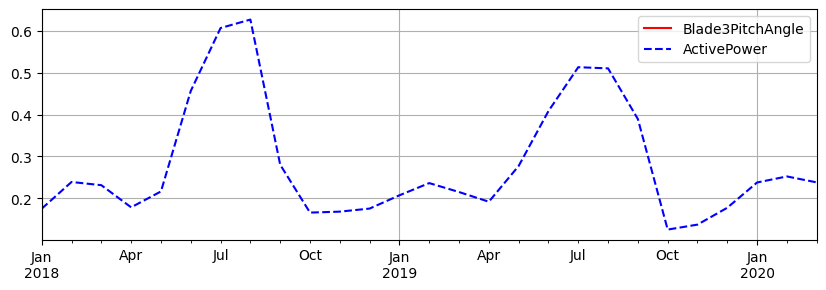

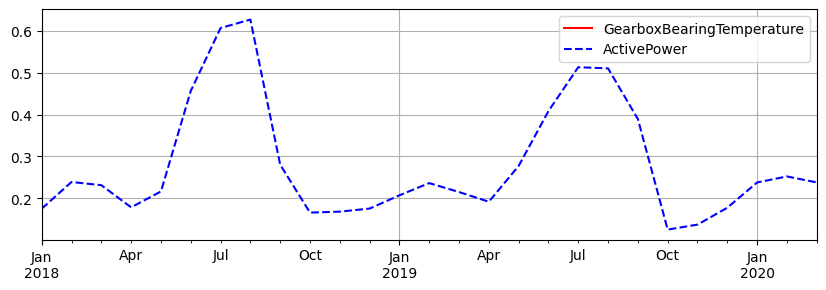

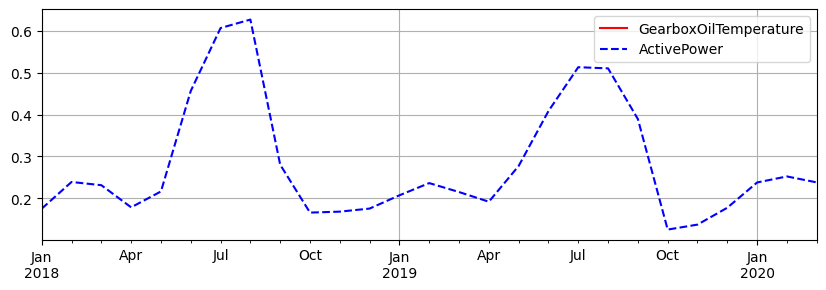

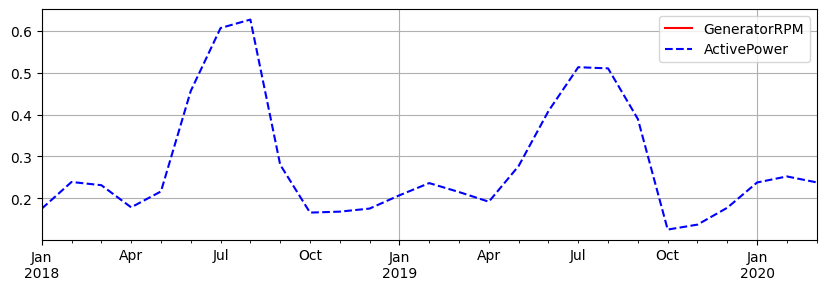

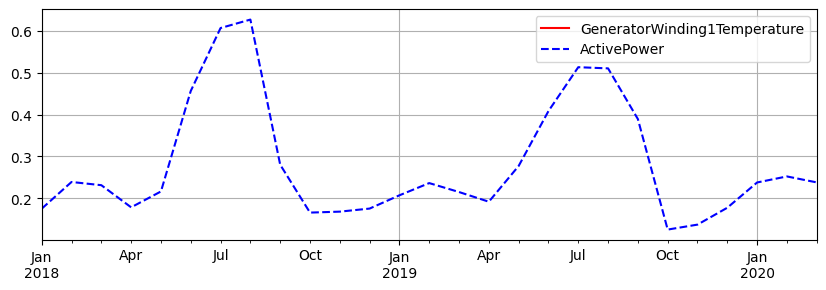

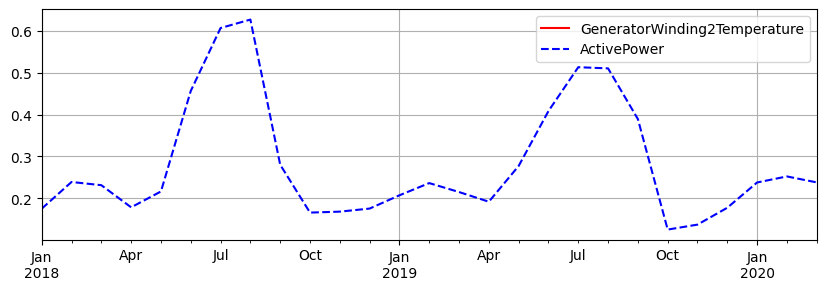

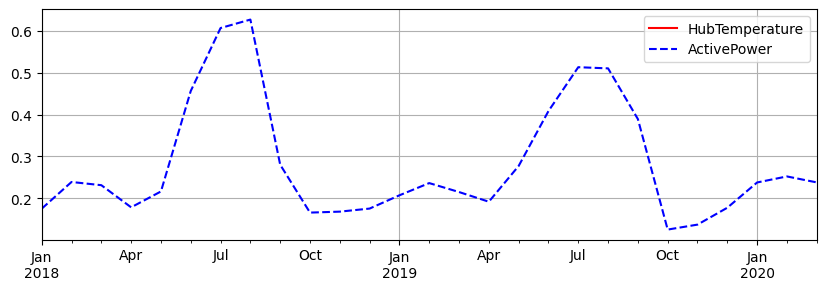

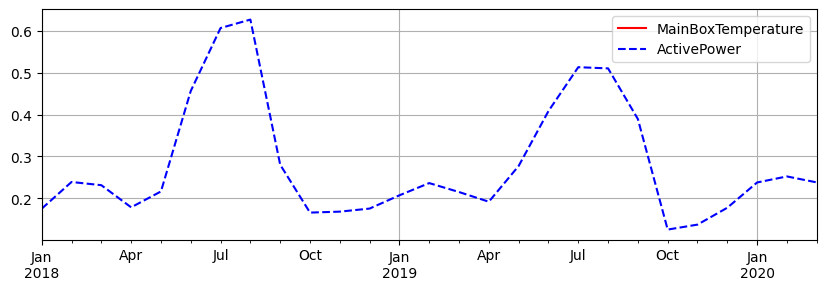

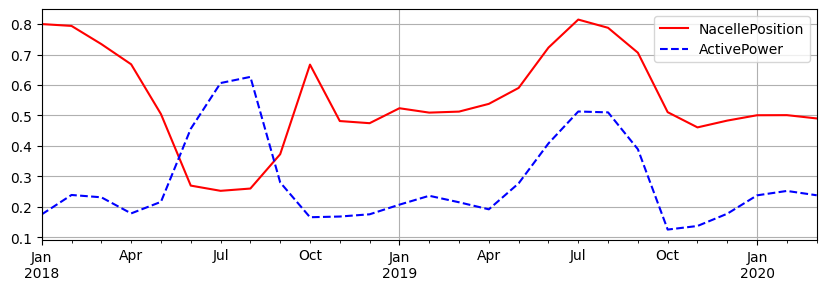

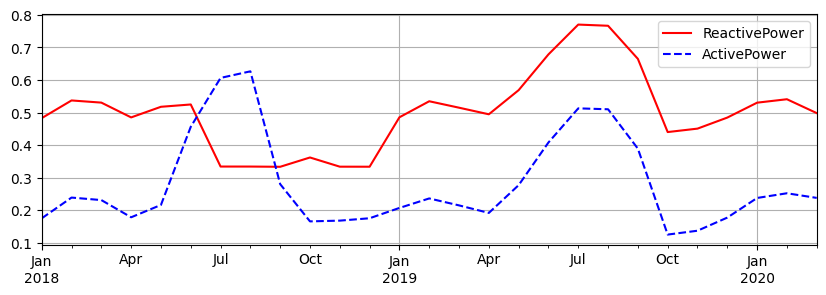

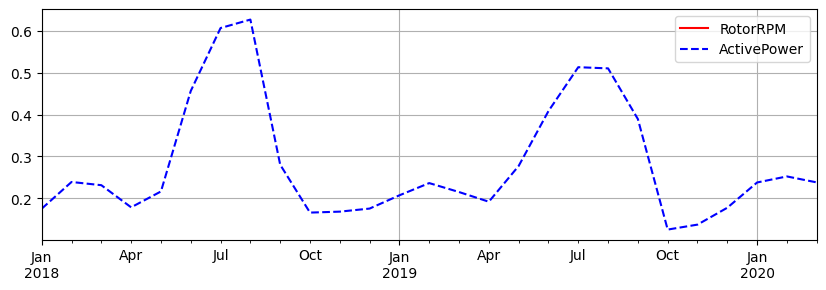

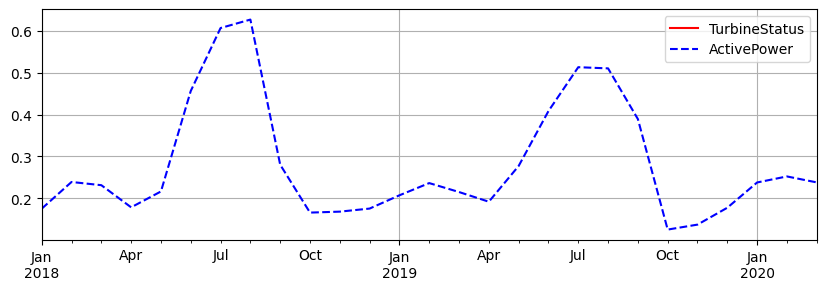

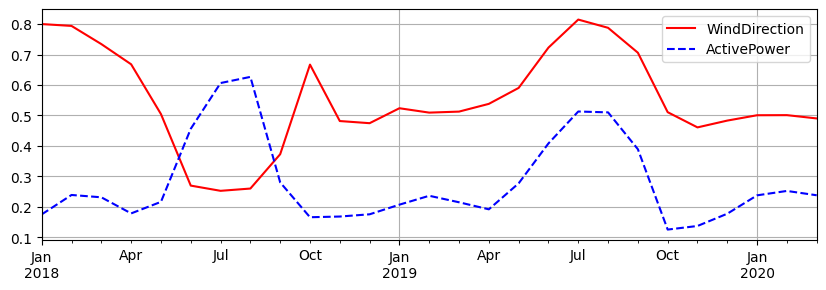

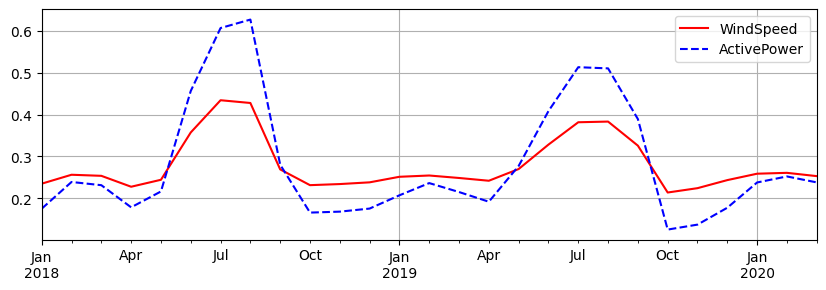

In [74]:

for i in data:  
    plt.figure(figsize=(10,3))
    data_viz[i].resample('M').mean().plot(legend=i, c ='r') # Monthly temporal resolution "M"
    (data_viz['ActivePower']*0.7).resample('M').mean().plot(style='--', legend='ActivePower', c = 'b')
    plt.legend()
    plt.grid()
    plt.show()

#### I noticed that there is a seasonal behavior in the the electric power generated between May and September (peak). 
#### and that there is a significant positive correlation between the wind speed and the generated electrical power,   
#### which is quite intuitive.
#### We cannot use the following features because they do not exhibit homogeneous behavior, they have a negative 
#### correlation during the peak of 2018 but a positive correlation during the peak of 2019.  WindDirection, ReactivePower and NacellePosition 


<Axes: >

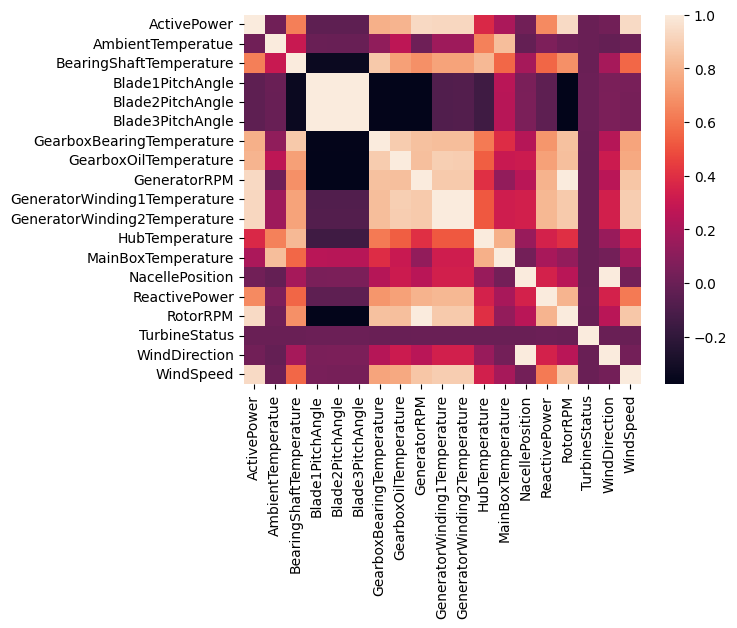

In [15]:
# Correlation viz

sns.heatmap(data.corr())

In [16]:
data.head()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
2018-01-01 06:20:00+00:00,26.212347,28.696304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.00,3.976499,NaN,NaN,252.00,3.042750
2018-01-01 06:40:00+00:00,59.632658,29.052567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,255.00,11.091660,NaN,NaN,255.00,3.424814
2018-01-01 06:50:00+00:00,40.889650,28.984758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264.75,4.234497,NaN,NaN,264.75,3.507172
2018-01-01 10:40:00+00:00,34.398111,30.282058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,283.75,5.347792,NaN,NaN,283.75,3.442212
2018-01-01 12:00:00+00:00,29.797653,29.333519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.00,6.022326,NaN,NaN,274.00,3.031363


In [17]:
# Quantitative correlations
corr = data.corr().unstack().sort_values(ascending=False) 
display(corr.drop_duplicates() ) # the correlation between our ActivePower target and  the rest of features


ActivePower                   ActivePower                     1.000000
GeneratorWinding2Temperature  GeneratorWinding1Temperature    0.999975
RotorRPM                      GeneratorRPM                    0.999504
Blade3PitchAngle              Blade1PitchAngle                0.998904
ActivePower                   WindSpeed                       0.937870
                                                                ...   
Blade3PitchAngle              RotorRPM                       -0.371668
Blade1PitchAngle              GearboxOilTemperature          -0.375540
GeneratorRPM                  Blade3PitchAngle               -0.376012
                              Blade1PitchAngle               -0.376096
GearboxOilTemperature         Blade3PitchAngle               -0.376894
Length: 140, dtype: float64


#### We can see that there is a strong correlation between the wind speed and the other features,    
#### we are not going to use them in our model to avoid redundancy (collinear vectors)

#### We will be satisfied with the only feature 'WindSpeed'

In [18]:
data = data[['ActivePower','WindSpeed']]
data.dropna()  # drop the NaN values 
display(data.head())
print()
print("Done...")
print()
print(f'The data contains {data.shape[0]} rows and {data.shape[1]} features ')

,ActivePower,WindSpeed
2018-01-01 06:20:00+00:00,26.212347,3.042750
2018-01-01 06:40:00+00:00,59.632658,3.424814
2018-01-01 06:50:00+00:00,40.889650,3.507172
2018-01-01 10:40:00+00:00,34.398111,3.442212
2018-01-01 12:00:00+00:00,29.797653,3.031363



Done...

The data contains 78989 rows and 2 features 


In [19]:
data.head()

,ActivePower,WindSpeed
2018-01-01 06:20:00+00:00,26.212347,3.042750
2018-01-01 06:40:00+00:00,59.632658,3.424814
2018-01-01 06:50:00+00:00,40.889650,3.507172
2018-01-01 10:40:00+00:00,34.398111,3.442212
2018-01-01 12:00:00+00:00,29.797653,3.031363


In [20]:
data.isna().sum()
print()
data = data.dropna()
data.isna().sum()

ActivePower    0
WindSpeed      0
dtype: int64

# 3- Modeling


### 3.1- Spliting Data Into Train_set and Test_set

In [22]:
X_train, X_test, y_train,y_test = data['WindSpeed'][0:78000], data['WindSpeed'][78000:], data['ActivePower'][0:78000],  data['ActivePower'][78000:]
len(X_train),len(X_test),len(y_train),len(y_test)

(78000, 681, 78000, 681)

### 3.2-  Creation  Of  XGBoost Model 

In [21]:
model1 = xgb.XGBRegressor(n_estimators = 200)

In [43]:

evaluation = [(X_train, y_train), (X_test, y_test)]
model1.fit(X_train, y_train, eval_set= evaluation,
          early_stopping_rounds=50, verbose=3)   # Stop training the model when performance on the validation set stops improving

[0]	validation_0-rmse:500.95314	validation_1-rmse:531.36536
[3]	validation_0-rmse:392.50133	validation_1-rmse:518.13362
[6]	validation_0-rmse:358.06250	validation_1-rmse:529.46115


[9]	validation_0-rmse:346.77558	validation_1-rmse:544.80811
[12]	validation_0-rmse:336.84789	validation_1-rmse:555.14002


/Users/macos/Applications/anaconda3/envs/demoday/lib/python3.11/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:327.67684	validation_1-rmse:552.37757
[18]	validation_0-rmse:319.05828	validation_1-rmse:565.99248
[21]	validation_0-rmse:313.48828	validation_1-rmse:493.65881
[24]	validation_0-rmse:308.23374	validation_1-rmse:493.80742
[27]	validation_0-rmse:303.60446	validation_1-rmse:494.40660
[30]	validation_0-rmse:300.84051	validation_1-rmse:470.53605
[33]	validation_0-rmse:297.46884	validation_1-rmse:474.81866
[36]	validation_0-rmse:294.31932	validation_1-rmse:475.60605
[39]	validation_0-rmse:289.88975	validation_1-rmse:477.84827
[42]	validation_0-rmse:287.52579	validation_1-rmse:481.63322
[45]	validation_0-rmse:284.37270	validation_1-rmse:472.45210
[48]	validation_0-rmse:281.97779	validation_1-rmse:475.44180
[51]	validation_0-rmse:280.16349	validation_1-rmse:475.46160
[54]	validation_0-rmse:277.87704	validation_1-rmse:482.25690
[57]	validation_0-rmse:276.12442	validation_1-rmse:490.73914
[60]	validation_0-rmse:272.93863	validation_1-rmse:491.01739
[63]	validation_0-rmse:2

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [44]:
# Prediction on test set 
pred = model1.predict(X_test)

In [25]:
 # Creating a dataframe that brings together the actual ​and the predicted values
df_RealPred= pd.DataFrame(data={'RealValues':y_test, 'Predictions':pred })  
df_RealPred.head()

,RealValues,Predictions
2020-03-25 16:30:00+00:00,934.971471,939.204224
2020-03-25 16:40:00+00:00,775.431240,897.396118
2020-03-25 16:50:00+00:00,815.450243,787.499634
2020-03-25 17:00:00+00:00,1034.150302,1072.593018
2020-03-25 17:10:00+00:00,948.592854,846.189331


In [26]:
# Metrics for evaluation 
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error, mean_absolute_percentage_error

print('The Coefficient of determination (R-squared) = {:.3f}'.format(r2_score(df_RealPred['RealValues'],df_RealPred['Predictions'])))
print('The RMSE error (RMSE)                        = {:.3f}'.format(mean_squared_error(df_RealPred['RealValues'],df_RealPred['Predictions'],squared=False)))
print('The mean absolute error (MAE)                = {:.3f}'.format(mean_absolute_error(df_RealPred['RealValues'],df_RealPred['Predictions'])))
print('The Mean absolute percentage error (MAPE)    = {:.3f}'.format(mean_absolute_percentage_error(df_RealPred['RealValues'],df_RealPred['Predictions'])))  

The Coefficient of determination (R-squared) = 0.968
The RMSE error (RMSE)                        = 94.810
The mean absolute error (MAE)                = 66.996
The Mean absolute percentage error (MAPE)    = 0.534


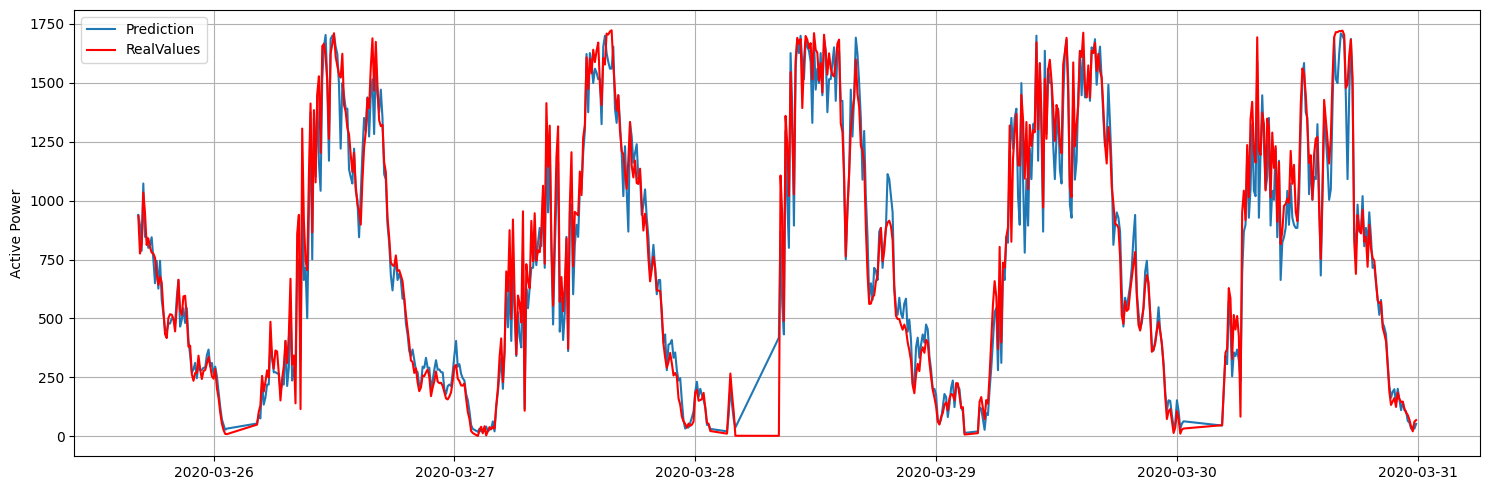

In [27]:
# Viz of real values vs predicted values 

plt.figure(figsize=(15,5))
plt.plot(df_RealPred['Predictions'],label='Prediction')
plt.plot(df_RealPred['RealValues'], color='red',label='RealValues')

plt.ylabel('Active Power')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

#### I notice that the predictions fit well with the test data

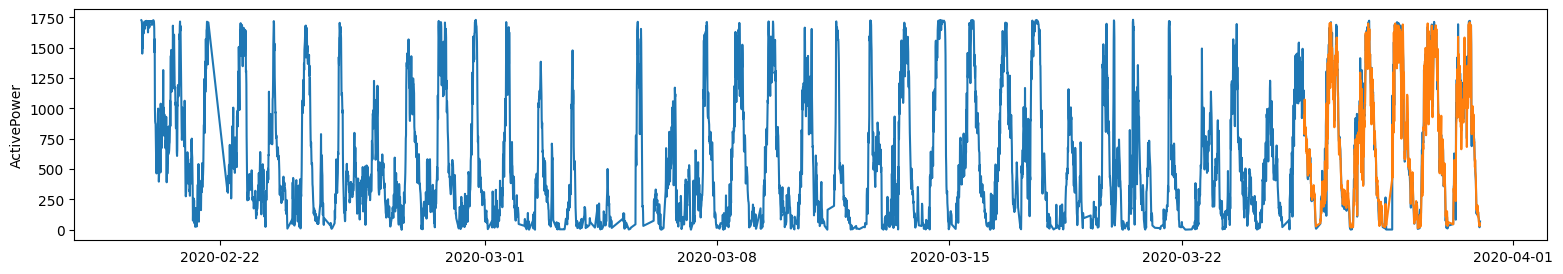

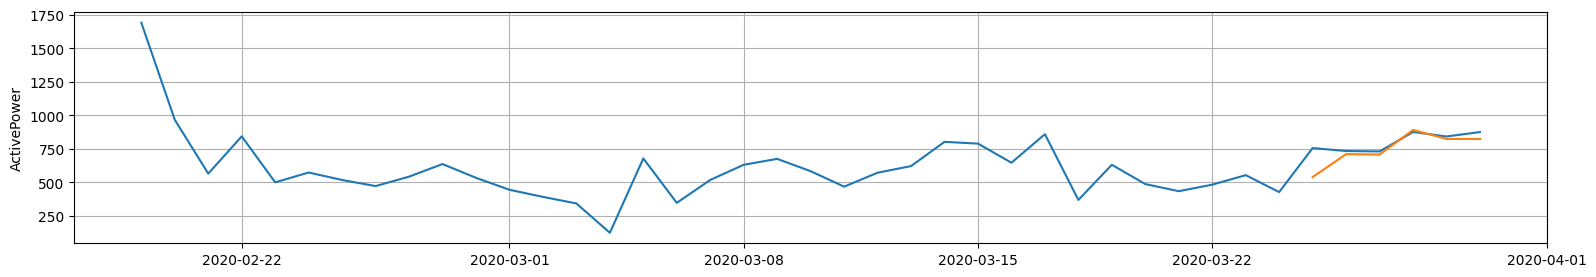

In [28]:

plt.figure(figsize=(19,3))
sns.lineplot(data = data['ActivePower'][74000:])
sns.lineplot(data = df_RealPred['Predictions'])

# ploting the mean values of our dataset
plt.figure(figsize=(19,3))
sns.lineplot(data = data['ActivePower'][74000:].resample('D').mean()) 
sns.lineplot(data = df_RealPred['Predictions'].resample('D').mean())
plt.grid();

In [55]:
X_train.columns


,hour,minute,day,month,year,dayofweek,dayofyear
2018-01-01 06:20:00+00:00,6,20,1,1,2018,0,1
2018-01-01 06:40:00+00:00,6,40,1,1,2018,0,1
2018-01-01 06:50:00+00:00,6,50,1,1,2018,0,1
2018-01-01 10:40:00+00:00,10,40,1,1,2018,0,1
2018-01-01 12:00:00+00:00,12,0,1,1,2018,0,1


# Saving the models

In [46]:
import pickle
file_name = "model1.pkl"
model1.save_model('model1.json')
pickle.dump(model1, open(file_name, "wb"))

In [53]:
# model1 = pickle.load('/Users/macos/Desktop/demoday/demoday/ML_Model/model1.pkl',
model = pickle.load(open('/Users/macos/Desktop/demoday/demoday/ML_Model/model1.pkl', "rb"))
print(model.get_booster().feature_names)

['hour', 'minute', 'day', 'month', 'year', 'dayofweek', 'dayofyear']


### 2.3 - Predicting Future Unseen Values 

In [101]:
data.tail(1)

,ActivePower,WindSpeed
2020-03-30 23:50:00+00:00,68.664425,3.475205


#### We can see that the last date in our dataset is '2020-03-30' so future predictions start on '2020-04-01'

In [29]:
# Creation of a 2 month dataframe with a frequency of 10 minutes

future = pd.date_range('2020-04-01 12:00:00+00:00','2020-06-01 12:00:00+00:00', freq='10min') 
future = pd.DataFrame(index=future)
print("The first date is :")
display(future.head(1))

print('The last date is :')
display(future.tail(1))



The first date is :


""
2020-04-01 12:00:00+00:00


The last date is :


""
2020-06-01 12:00:00+00:00


In [30]:
def create_f(df):

    ''' Function for creating  a date and time  columns, minute, hour,day, 
        month, year, dayofweek, dayofyear and weekofyear) from DateTime type colunn index .
        type(df) : pandas DataFrame'''
    
    df = df.copy()
    df['minute'] = df.index.minute
    df['hour'] = df.index.hour
    df['day'] = df.index.day
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofweek'] = df.index.dayofweek
    df['dayofyear'] = df.index.dayofyear
    df['weekofyear'] = df.index.isocalendar().week
    
    return df

In [31]:

data2 = data.copy()
data2 = create_f(data2)
print("done ...")
print()
display(data2.head())
print()
print("Columns :" , list(data2.columns))

done ...



,ActivePower,WindSpeed,minute,hour,day,month,year,dayofweek,dayofyear,weekofyear
2018-01-01 06:20:00+00:00,26.212347,3.042750,20,6,1,1,2018,0,1,1
2018-01-01 06:40:00+00:00,59.632658,3.424814,40,6,1,1,2018,0,1,1
2018-01-01 06:50:00+00:00,40.889650,3.507172,50,6,1,1,2018,0,1,1
2018-01-01 10:40:00+00:00,34.398111,3.442212,40,10,1,1,2018,0,1,1
2018-01-01 12:00:00+00:00,29.797653,3.031363,0,12,1,1,2018,0,1,1



Columns : ['ActivePower', 'WindSpeed', 'minute', 'hour', 'day', 'month', 'year', 'dayofweek', 'dayofyear', 'weekofyear']


In [32]:
features = ['hour', 'minute', 'day', 'month', 'year','dayofweek', 'dayofyear']
label = 'ActivePower'
X_train, X_test, y_train,y_test = data2[features][0:78000], data2[features][78000:], data2[label][0:78000],  data2[label][78000:]
len(X_train),len(X_test),len(y_train),len(y_test)



(78000, 681, 78000, 681)

In [33]:
model2 = xgb.XGBRegressor(n_estimators = 100,learning_rate=0.01)
model2.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],
          early_stopping_rounds=50,verbose=True) 

[0]	validation_0-rmse:590.64594	validation_1-rmse:532.72471
[1]	validation_0-rmse:587.33865	validation_1-rmse:532.33787
[2]	validation_0-rmse:584.05707	validation_1-rmse:531.97837


[3]	validation_0-rmse:580.83841	validation_1-rmse:531.64552
[4]	validation_0-rmse:577.62910	validation_1-rmse:530.97189
[5]	validation_0-rmse:574.46608	validation_1-rmse:530.32547
[6]	validation_0-rmse:571.34893	validation_1-rmse:529.70565
[7]	validation_0-rmse:568.26714	validation_1-rmse:529.09509
[8]	validation_0-rmse:565.23902	validation_1-rmse:528.50664
[9]	validation_0-rmse:562.25033	validation_1-rmse:528.20211
[10]	validation_0-rmse:559.29827	validation_1-rmse:527.65601
[11]	validation_0-rmse:556.39551	validation_1-rmse:527.39468
[12]	validation_0-rmse:553.52957	validation_1-rmse:526.88901
[13]	validation_0-rmse:550.72345	validation_1-rmse:526.65845


/Users/macos/Applications/anaconda3/envs/demoday/lib/python3.11/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:547.94108	validation_1-rmse:526.19693
[15]	validation_0-rmse:545.20217	validation_1-rmse:525.97299
[16]	validation_0-rmse:542.51043	validation_1-rmse:525.81030
[17]	validation_0-rmse:539.84676	validation_1-rmse:525.39947
[18]	validation_0-rmse:537.22700	validation_1-rmse:525.22530
[19]	validation_0-rmse:534.59059	validation_1-rmse:524.76489
[20]	validation_0-rmse:532.04198	validation_1-rmse:524.39922
[21]	validation_0-rmse:529.57701	validation_1-rmse:524.31146
[22]	validation_0-rmse:527.11975	validation_1-rmse:524.11130
[23]	validation_0-rmse:524.61975	validation_1-rmse:523.70865
[24]	validation_0-rmse:522.21712	validation_1-rmse:523.13414
[25]	validation_0-rmse:519.85082	validation_1-rmse:522.49244
[26]	validation_0-rmse:517.52303	validation_1-rmse:522.41697
[27]	validation_0-rmse:515.22530	validation_1-rmse:521.80864
[28]	validation_0-rmse:512.96265	validation_1-rmse:521.25601
[29]	validation_0-rmse:510.74126	validation_1-rmse:520.68188
[30]	validation_0-rmse:5

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [34]:
pred = model2.predict(X_test)

In [35]:
df2 = pd.DataFrame(data={'real_values':y_test, 'Predictions':pred})  

In [36]:
# metrics for evaluation 
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
print('The Coefficient of determination (R-squared) = {:.3f}'.format(r2_score(df2['real_values'],df2['Predictions'])))
print('The RMSE error (RMSE)                        = {:.2f}'.format(mean_squared_error(df2['real_values'],df2['Predictions'],squared=False)))
print('The mean absolute error (MAE)                = {:.2f}'.format(mean_absolute_error(df2['real_values'],df2['Predictions'])))
print('The Mean absolute percentage error (MAPE)    = {:.3f}'.format(mean_absolute_percentage_error(df2['real_values'],df2['Predictions'])))  

The Coefficient of determination (R-squared) = 0.043
The RMSE error (RMSE)                        = 519.32
The mean absolute error (MAE)                = 441.65
The Mean absolute percentage error (MAPE)    = 4.143


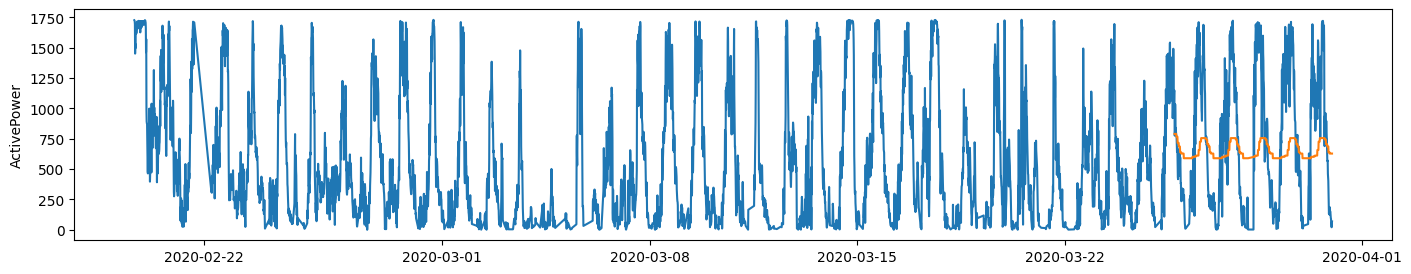

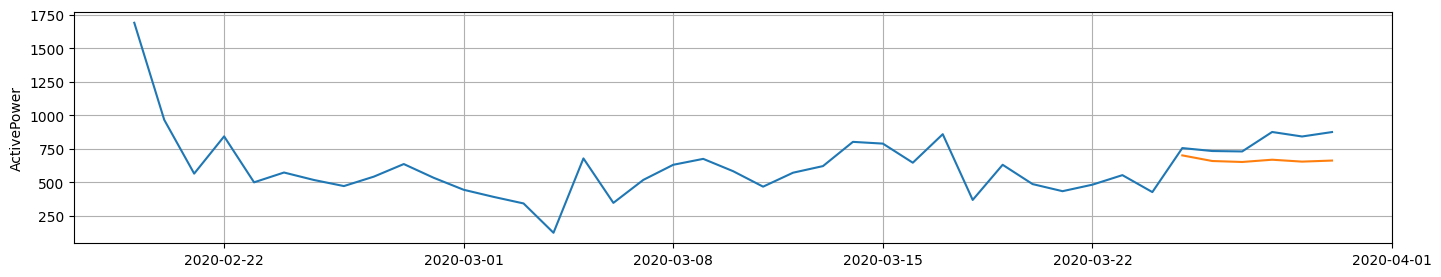

In [37]:
plt.figure(figsize=(17,3))
sns.lineplot(data = data[label][74000:])
sns.lineplot(data = df2['Predictions'])

plt.figure(figsize=(17,3))
sns.lineplot(data = data[label][74000:].resample('D').mean())
sns.lineplot(data = df2['Predictions'].resample('D').mean())
plt.grid()

In [40]:
new = create_f(future)
print(new[features].head())
fut = model2.predict(new[features])
future = pd.DataFrame(data={'Predictions':fut}, index = new.index)

                           hour  minute  day  month  year  dayofweek  \
2020-04-01 12:00:00+00:00    12       0    1      4  2020          2   
2020-04-01 12:10:00+00:00    12      10    1      4  2020          2   
2020-04-01 12:20:00+00:00    12      20    1      4  2020          2   
2020-04-01 12:30:00+00:00    12      30    1      4  2020          2   
2020-04-01 12:40:00+00:00    12      40    1      4  2020          2   

                           dayofyear  
2020-04-01 12:00:00+00:00         92  
2020-04-01 12:10:00+00:00         92  
2020-04-01 12:20:00+00:00         92  
2020-04-01 12:30:00+00:00         92  
2020-04-01 12:40:00+00:00         92  


In [41]:
future

(8785, 1)

KeyError: 'Predictions'

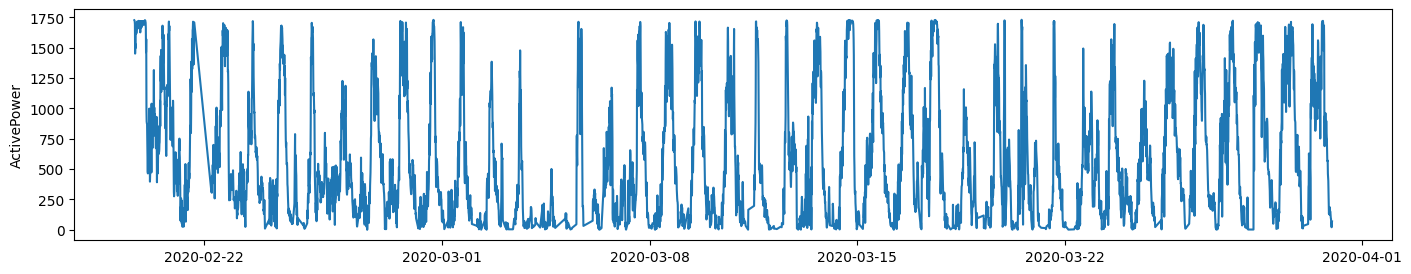

In [39]:
plt.figure(figsize=(17,3))
sns.lineplot(data = data[label][74000:])
sns.lineplot(data = future['Predictions'])

plt.figure(figsize=(17,3))
sns.lineplot(data = data[label][74000:].resample('D').mean())
sns.lineplot(data = future['Predictions'].resample('D').mean());

# saving the models

In [135]:
import pickle
file_name = "model2.pkl"
model1.save_model('model1.json')
pickle.dump(model2, open(file_name, "wb"))


In [52]:
pickle.dump(model1, open(model1.pkl, "wb"))

NameError: name 'pickle' is not defined